In [46]:
# Libraries

import numpy as np
import pandas as pd
import re

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt


import string
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
url_data = 'https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/tripadvisor_reviews.tsv'

In [48]:
data = pd.read_csv(url_data, sep="\t")

In [49]:
display(data.head())
display(data.tail())

,Review,positive
0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,0
3,"unique, great stay, wonderful time hotel monac...",1
4,"great stay great stay, went seahawk game aweso...",1


,Review,positive
20486,"best kept secret 3rd time staying charm, not 5...",1
20487,great location price view hotel great quick pl...,1
20488,"ok just looks nice modern outside, desk staff ...",0
20489,hotel theft ruined vacation hotel opened sept ...,0
20490,"people talking, ca n't believe excellent ratin...",0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    20491 non-null  object
 1   positive  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [51]:
print("Data contains {} rows and {} cols".format(data.shape[0],data.shape[1]))

Data contains 20491 rows and 2 cols


In [52]:
data.positive.value_counts()

1    15093
0     5398
Name: positive, dtype: int64

In [53]:
data.isnull().sum()

Review      0
positive    0
dtype: int64

In [54]:
data.duplicated(subset=["Review"]).sum()

0

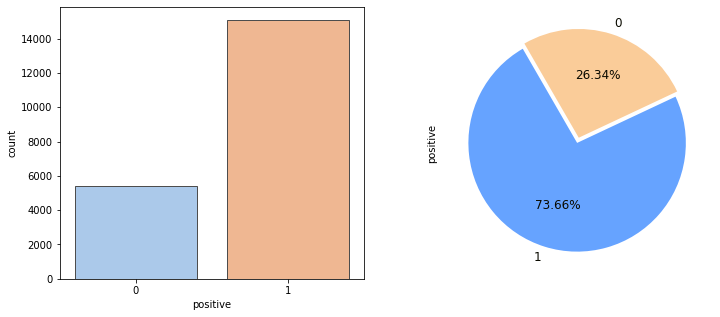

In [55]:
# Distribution plot of the positive column
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))

sns.countplot(x=data.positive, data=data, palette="pastel",ax=ax[0], edgecolor=".3")
data.positive.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99'], 
                                        explode = (0, 0.05), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

In [56]:
df = data.copy()

## Preprocess the texts:

* First we will expand the contractions of the tweets
* We will tokenize
* We will remove stop words
* We will remove digits
* We will remove punctuation
* We will lemmatize

In [57]:
def remove_digits(text):
    text = re.sub('[0-9]*','', text)
    return text

def remove_punctuations(text):
    text = ' '.join([i for i in text if i not in frozenset(string.punctuation)])
    return text

stop = stopwords.words('english')
stop_list = ["ok","ca","n't", "3rd","n"]
for i in range(len(stop_list)):
    stop.append(stop_list[i])
    
def remove_stopword(text):
    words = [w for w in text if w not in stop]
    return words

In [58]:
tokenizer = RegexpTokenizer(r'\w+')
df['Review_new'] = df['Review'].apply(lambda x: tokenizer.tokenize(x))
df['Review_new'] = df['Review_new'].apply(remove_stopword) 
df['Review_new'] = df['Review_new'].apply(remove_punctuations) 
df['Review_new'] = df['Review_new'].apply(remove_digits) 
df.head()

,Review,positive,Review_new
0,nice hotel expensive parking got good deal sta...,1,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,0,nothing special charge diamond member hilton d...
2,nice rooms not 4* experience hotel monaco seat...,0,nice rooms experience hotel monaco seattle go...
3,"unique, great stay, wonderful time hotel monac...",1,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",1,great stay great stay went seahawk game awesom...


In [59]:
import spacy
nlp = spacy.load('en')

In [60]:
df['Review_new'] = df['Review_new'].map(lambda x: " ".join([token.lemma_ for token in nlp(x)]))

In [61]:
df.head()

,Review,positive,Review_new
0,nice hotel expensive parking got good deal sta...,1,nice hotel expensive parking get good deal sta...
1,ok nothing special charge diamond member hilto...,0,nothing special charge diamond member hilton d...
2,nice rooms not 4* experience hotel monaco seat...,0,nice room experience hotel monaco seattle go...
3,"unique, great stay, wonderful time hotel monac...",1,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",1,great stay great stay go seahawk game awesome ...


In [62]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
df['Review_2'] = df['Review_new'].apply(word_tokenize) 

In [64]:
def get_token_counts(tokenized_review):
    return len(tokenized_review)

In [65]:
df['num_tokens'] = df['Review_2'].map(lambda x: get_token_counts(x))
df['Review_2'] = df['Review_2'].apply(remove_punctuations) 

In [66]:
df.head()

,Review,positive,Review_new,Review_2,num_tokens
0,nice hotel expensive parking got good deal sta...,1,nice hotel expensive parking get good deal sta...,nice hotel expensive parking get good deal sta...,81
1,ok nothing special charge diamond member hilto...,0,nothing special charge diamond member hilton d...,nothing special charge diamond member hilton d...,231
2,nice rooms not 4* experience hotel monaco seat...,0,nice room experience hotel monaco seattle go...,nice room experience hotel monaco seattle good...,199
3,"unique, great stay, wonderful time hotel monac...",1,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,84
4,"great stay great stay, went seahawk game aweso...",1,great stay great stay go seahawk game awesome ...,great stay great stay go seahawk game awesome ...,172


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


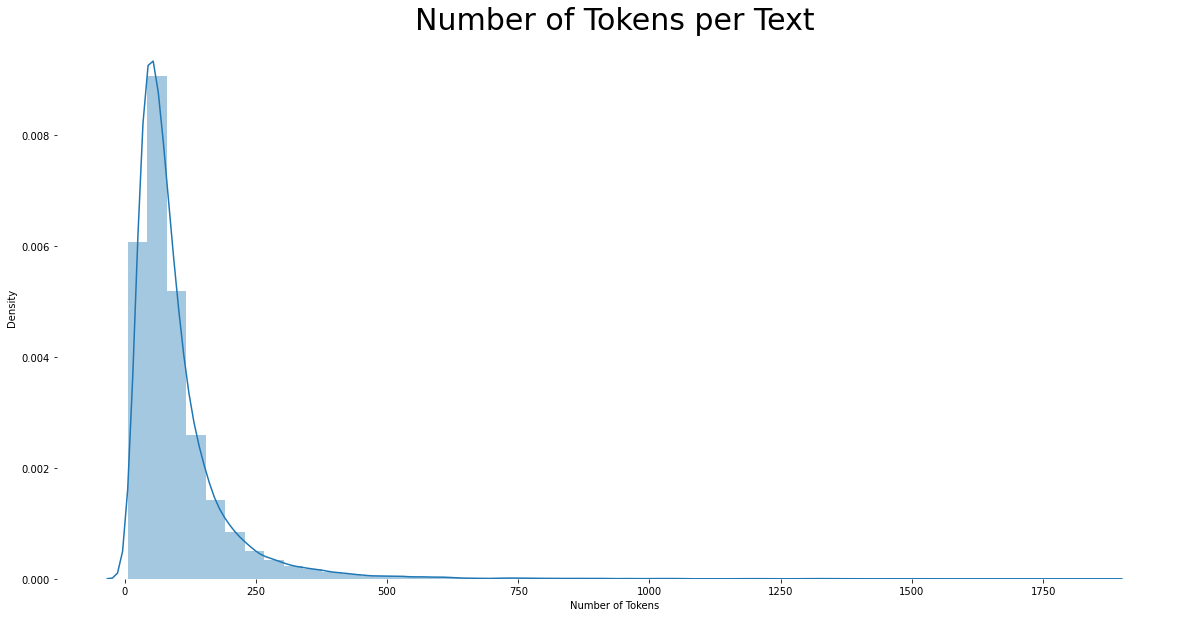

In [67]:
# Visualize histogram of tokens per text
fig = plt.figure(figsize=(20,10))
sns.distplot(df.num_tokens)
sns.despine(left=True, bottom=True)
plt.xlabel('Number of Tokens')
plt.title('Number of Tokens per Text', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.show()

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

max_features=10
count_vectorizer = CountVectorizer(max_features=max_features,stop_words=stop)
vectors = count_vectorizer.fit_transform(df.Review_2)
print('In Dataset, the most common {} words:\n{} '.format(max_features,count_vectorizer.get_feature_names()))

In Dataset, the most common 10 words:
['day', 'good', 'great', 'hotel', 'nice', 'night', 'room', 'staff', 'stay', 'time'] 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


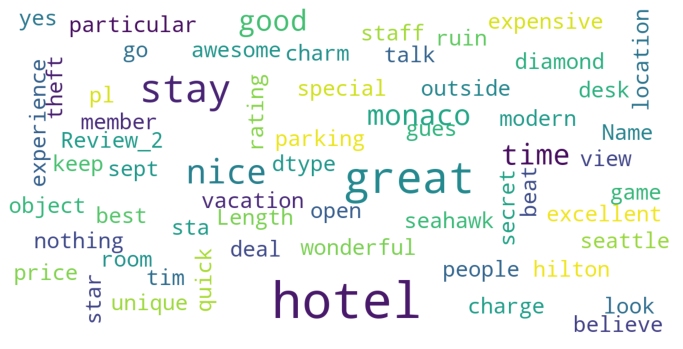

In [69]:
# The Visualization of the 100 words most frequently associated with WordCloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df.Review_2)

## Vectorization
After cleaning and processing the text, we will extract the features using the TFIDFVectorizer:

* We want to use a maximum of 300 features
* unigrams, bigrams and trigrams
* The system does not take into account the elements that appear in less than 5% of the documents.

In [80]:
# Getting trigrams 
tfIdfVectorizer_ngram = TfidfVectorizer(use_idf=True, ngram_range=(1,3)) # (3,3)->trigram
tfIdf_ngram = tfIdfVectorizer_ngram.fit_transform(df.Review_2)
tf_idf_df_ngram = pd.DataFrame(tfIdf_ngram[0].T.todense(), index=tfIdfVectorizer_ngram.get_feature_names(), columns=["TF-IDF"])
tf_idf_df_ngram  = tf_idf_df_ngram.sort_values('TF-IDF', ascending=False)
tf_idf_df_ngram .head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,TF-IDF
parking,0.099303
existent view,0.086518
night morning loud,0.086518
nice goldfish,0.086518
nice goldfish stay,0.086518
maybe noisy,0.086518
nice experience pay,0.086518
little disappointed non,0.086518
maybe noisy neighbor,0.086518
touch take advantage,0.086518


In [83]:
# There is 155 features.
tf_idf_df_filter = tf_idf_df_ngram[tf_idf_df_ngram['TF-IDF'] > 0.05]
tf_idf_df_filter

,TF-IDF
parking,0.099303
existent view,0.086518
night morning loud,0.086518
nice goldfish,0.086518
nice goldfish stay,0.086518
...,...
check quick,0.052341
stay nice,0.051698
arrive late,0.051428
bang,0.051296


## Frequency graphs of the most frequent ngrams

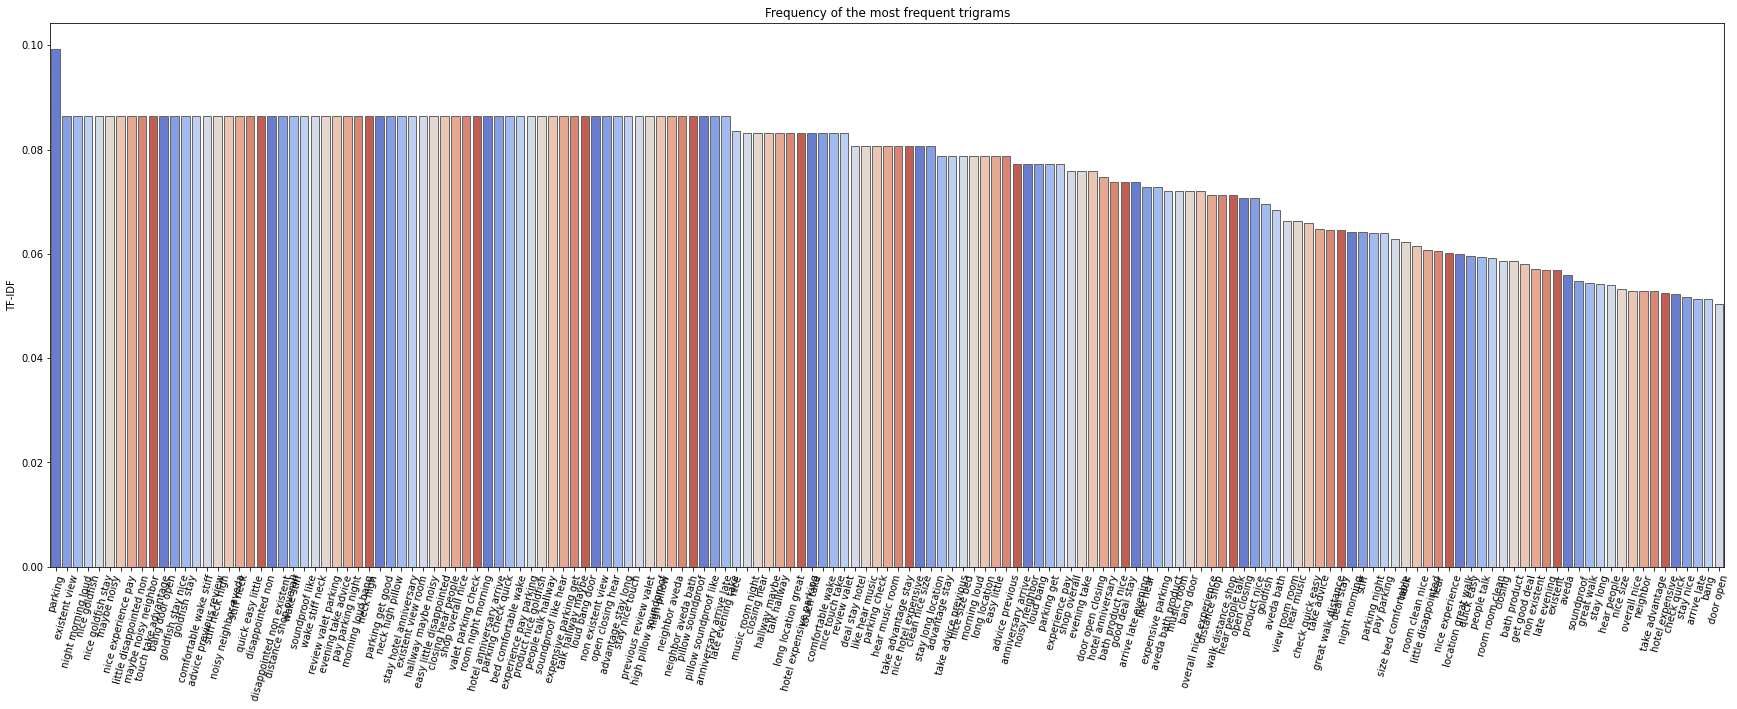

In [86]:
plt.subplots(figsize = (30,10))
chart = sns.barplot(x=tf_idf_df_filter.index, y=tf_idf_df_filter['TF-IDF'] , palette=sns.color_palette("coolwarm",10), edgecolor=".4")
chart.set_xticklabels(chart.get_xticklabels(), rotation=75)
chart.set_title('Frequency of the most frequent trigrams');